In [52]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For better visualization
plt.style.use('seaborn-v0_8')
sns.set_palette('coolwarm')

# Step 2: Load the dataset
from google.colab import files
uploaded = files.upload()

# Step 3: Read CSV file
df = pd.read_csv('Netflix Dataset.csv')

# Step 4: Basic info
print("Dataset Shape:", df.shape)
print("\nColumn Names:\n", df.columns)
print("\nBasic Info:")
df.info()

# Step 5: First few records
df.head()


Saving Netflix Dataset.csv to Netflix Dataset.csv
Dataset Shape: (7789, 11)

Column Names:
 Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

        Release_Date Rating   Duration  \
0    August 14, 2020  TV-MA  4 Seasons   
1  December 23, 2016  TV-MA     93 min   
2  December 20, 2018      R     78 min   
3  November 16, 2017  PG-13     80 min   
4    January 1, 2020  PG-13    123 min   

                                                Type  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         Description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [53]:
# Check actual column names to confirm naming pattern
print(df.columns.tolist())


['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']


In [54]:
df['Type'].unique()[:20]


array(['International TV Shows, TV Dramas, TV Sci-Fi & Fantasy',
       'Dramas, International Movies',
       'Horror Movies, International Movies',
       'Action & Adventure, Independent Movies, Sci-Fi & Fantasy',
       'Dramas', 'International TV Shows, TV Dramas, TV Mysteries',
       'Horror Movies, International Movies, Thrillers',
       'Dramas, Thrillers',
       'Crime TV Shows, International TV Shows, TV Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Documentaries, International Movies, Sports Movies',
       'Independent Movies, Sci-Fi & Fantasy, Thrillers',
       'Dramas, International Movies, Thrillers',
       'International TV Shows, TV Dramas',
       'Comedies, Dramas, Independent Movies', 'Sports Movies',
       'Dramas, Independent Movies, International Movies',
       'Action & Adventure, Dramas, International Movies',
       'Anime Series, International TV Shows', 'Documentaries'],
      dtype=object)

In [55]:
# Step 1: Check missing values
print("\nMissing Values:\n", df.isnull().sum())

# Step 2: Drop duplicate records (if any)
df.drop_duplicates(inplace=True)

# Step 3: Convert 'Release_Date' to datetime for time-based analysis
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Step 4: Extract useful date-related columns
df['year_added'] = df['Release_Date'].dt.year
df['month_added'] = df['Release_Date'].dt.month

# Step 5: Drop irrelevant or mostly empty columns (optional)
df.drop(['Description'], axis=1, inplace=True)

df.head()



Missing Values:
 Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64


Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  Release_Date Rating   Duration  \
0   2020-08-14  TV-MA  4 Seasons   
1   2016-12-23  TV-MA     93 min   
2   2018-12-20      R     78 min   
3   2017-11-16  PG-13     80 min   
4   2020-01-01  PG-13    123 min   

                                                Type  year_added  month_added  
0  International TV Shows, TV Dramas, TV Sci-Fi &...      2020.0          8.0  
1                       Dramas, International Movies      2016.0         12.0  
2                Horror Movies, International Movies      2018.0         12.0  
3  Action & Adventure, Independent Movies, Sci-Fi...      2017.0         11.0  
4                                             Dramas      2020.0          1.0

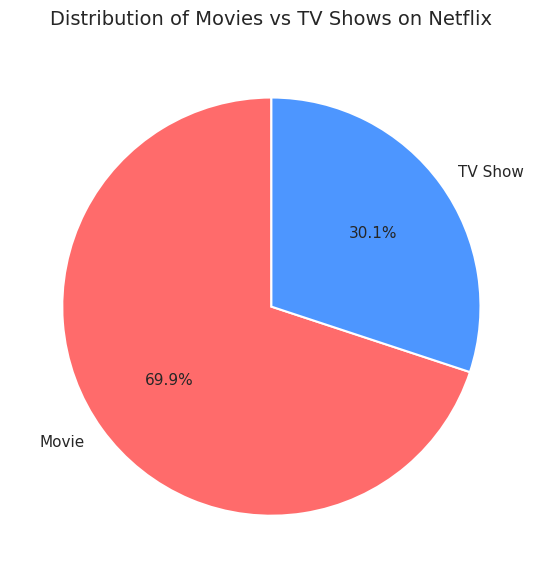

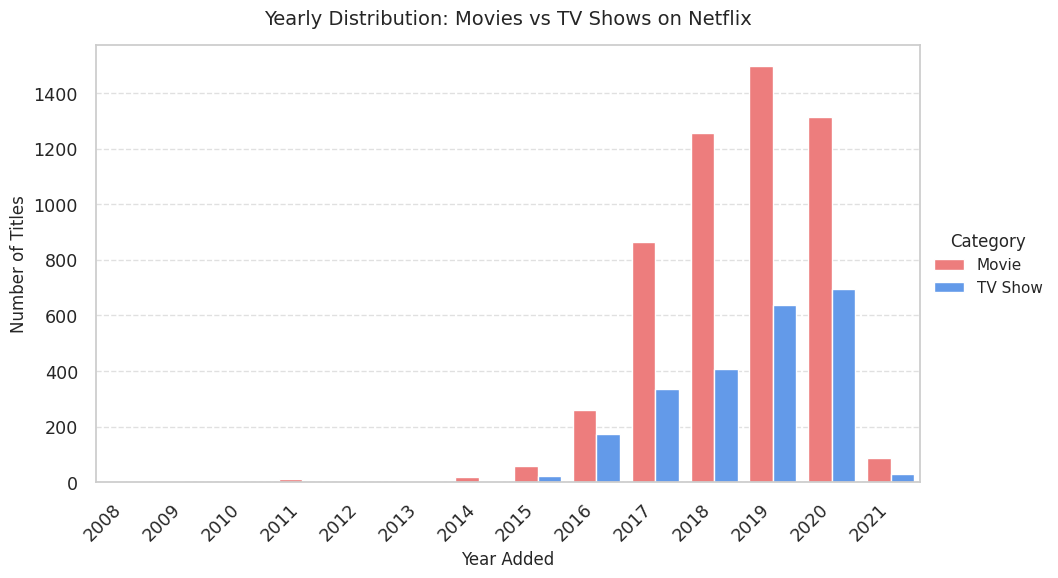

In [56]:
# Drop missing years
df = df.dropna(subset=['year_added'])
df['year_added'] = df['year_added'].astype(int)

# Apply consistent Seaborn style
sns.set(style="whitegrid", font_scale=1.15)

# --- Count of Movies vs TV Shows ---
type_count = df['Category'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    type_count,
    labels=type_count.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff6b6b', '#4d96ff'],
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5},
    textprops={'fontsize': 11}
)
plt.title("Distribution of Movies vs TV Shows on Netflix", fontsize=14, pad=15)
plt.tight_layout()
plt.show()


# --- Yearly Trend of Content Addition ---
df_sorted = df.sort_values('year_added')

plt.figure(figsize=(12,6))
sns.countplot(
    data=df_sorted,
    x='year_added',
    hue='Category',
    palette=['#ff6b6b', '#4d96ff']
)

plt.title("Yearly Distribution: Movies vs TV Shows on Netflix", fontsize=14, pad=15)
plt.xlabel("Year Added", fontsize=12)
plt.ylabel("Number of Titles", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(
    title="Category",
    title_fontsize=12,
    fontsize=11,
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    frameon=False
)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout(rect=[0, 0, 0.9, 1])  # leaves space for legend
plt.show()


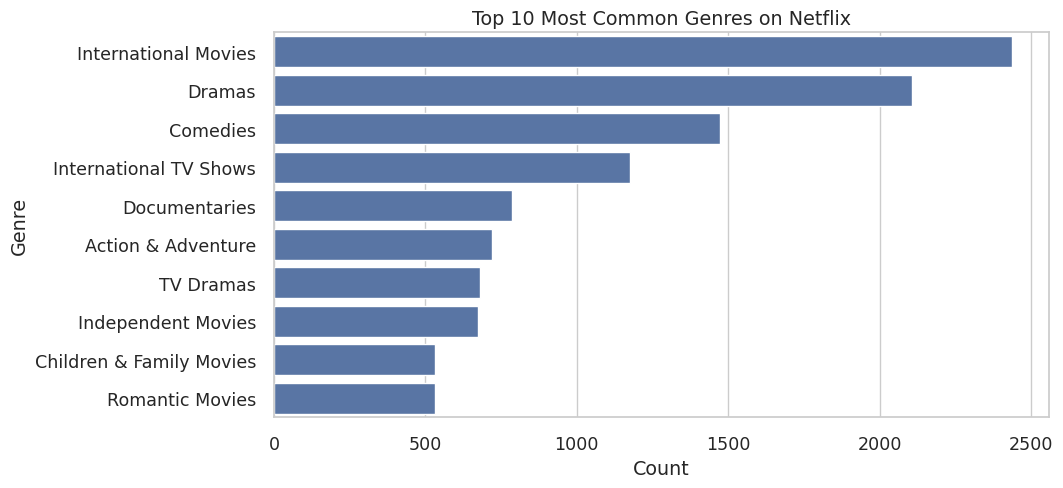

In [59]:
# Split genres and count frequency
from collections import Counter

genre_list = []
for s in df['Type'].dropna():
    genre_list.extend([x.strip() for x in s.split(',')])

sns.set_style("whitegrid")

# Choose a palette (you can try 'rocket', 'mako', 'viridis', 'coolwarm', etc.)
palette = sns.color_palette("viridis", n_colors=len(genres_df))

plt.figure(figsize=(10,5))
sns.barplot(data=genres_df, x='Count', y='Genre')
plt.title("Top 10 Most Common Genres on Netflix")
plt.show()


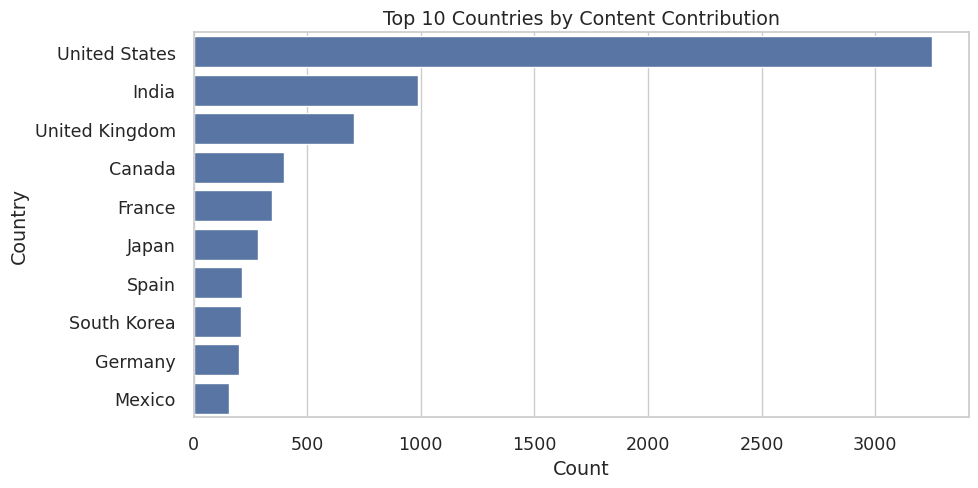

In [58]:
# Handle multiple countries in one cell
country_list = []
for s in df['Country'].dropna():
    country_list.extend([x.strip() for x in s.split(',')])

country_counts = Counter(country_list).most_common(10)
country_df = pd.DataFrame(country_counts, columns=['Country', 'Count'])

plt.figure(figsize=(10,5))
sns.barplot(data=country_df, x='Count', y='Country')
plt.title("Top 10 Countries by Content Contribution")
plt.show()


/tmp/ipython-input-3793121756.py:8: UserWarning: 
The palette list has fewer values (2) than needed (487) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(
/tmp/ipython-input-3793121756.py:35: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leaves space for legend


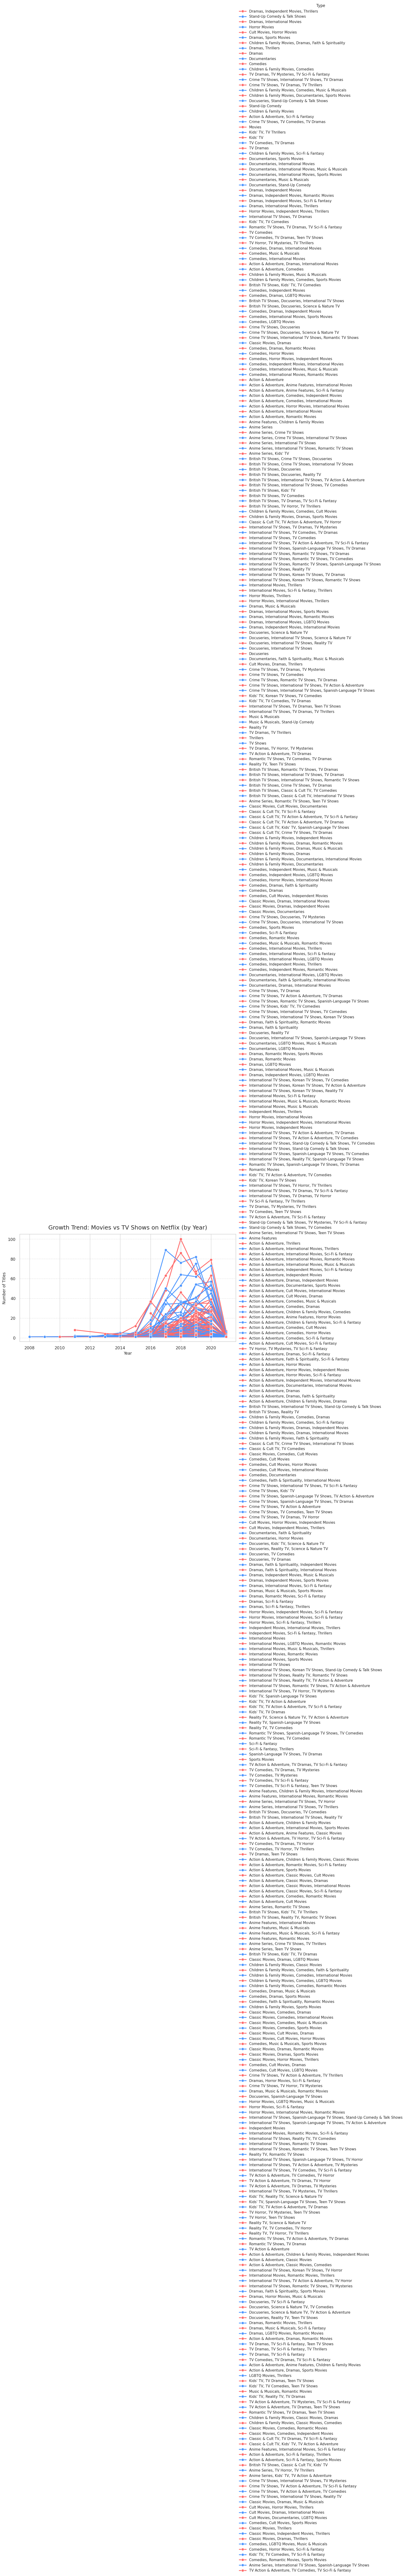

In [37]:
# Group by year and type to see growth trends
trend = df.groupby(['year_added', 'Type']).size().reset_index(name='count')
trend = trend.sort_values('year_added')

sns.set(style="whitegrid", font_scale=1.15)

plt.figure(figsize=(12,6))
sns.lineplot(
    data=trend,
    x='year_added',
    y='count',
    hue='Type',
    palette=['#ff6b6b', '#4d96ff'],
    marker='o',
    linewidth=2.5,
    markersize=8
)

plt.title("Growth Trend: Movies vs TV Shows on Netflix (by Year)", fontsize=18, pad=15)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Titles", fontsize=12)

# ✅ Move legend outside
plt.legend(
    title="Type",
    title_fontsize=12,
    fontsize=11,
    loc='center left',
    bbox_to_anchor=(1, 0.5),  # Moves it outside on the right
    frameon=False
)

# ✅ Add soft grid and spacing
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leaves space for legend
plt.show()



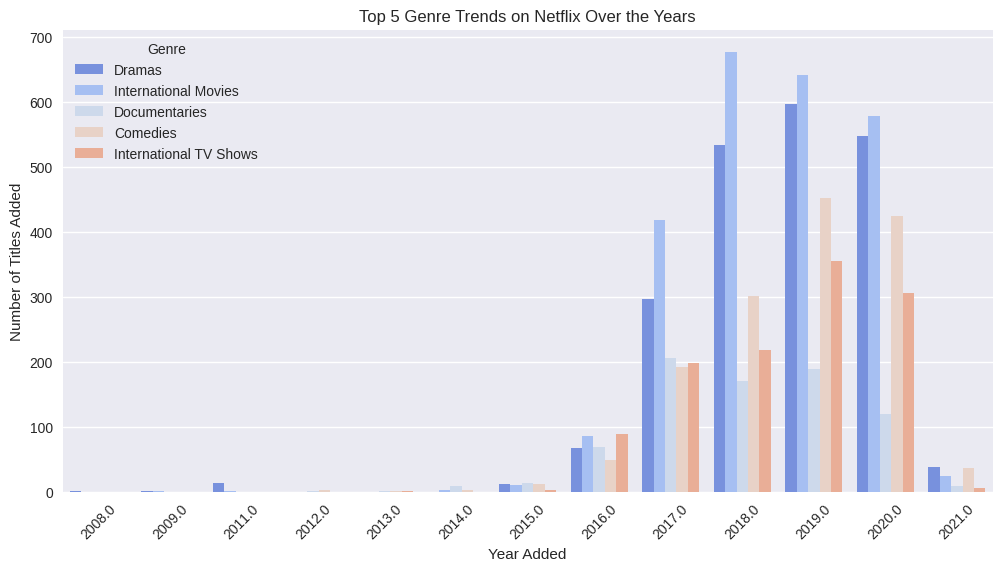

In [26]:
# Extract top 5 genres
genre_df = df[['Type', 'year_added']].dropna()

# Explode multiple genres per title
genre_explode = genre_df.assign(Genre=genre_df['Type'].str.split(',')).explode('Genre')
genre_explode['Genre'] = genre_explode['Genre'].str.strip()

# Top 5 genres overall
top_genres = genre_explode['Genre'].value_counts().nlargest(5).index

# Filter data for those genres only
top_genre_trends = genre_explode[genre_explode['Genre'].isin(top_genres)]

plt.figure(figsize=(12,6))
sns.countplot(data=top_genre_trends, x='year_added', hue='Genre')
plt.title("Top 5 Genre Trends on Netflix Over the Years")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles Added")
plt.xticks(rotation=45)
plt.legend(title='Genre')
plt.show()


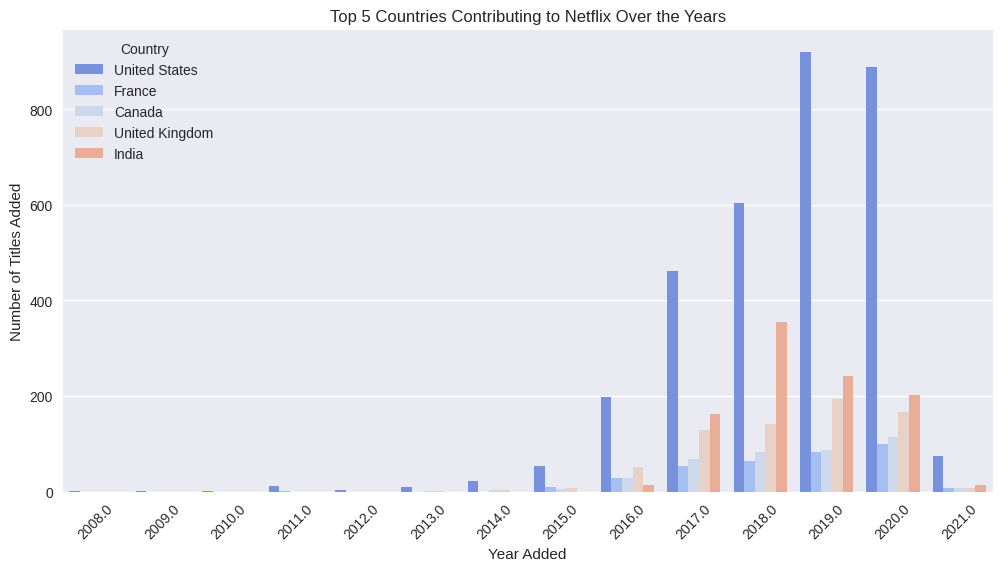

In [27]:
# Prepare exploded country data
country_df = df[['Country', 'year_added']].dropna()
country_explode = country_df.assign(Country=country_df['Country'].str.split(',')).explode('Country')
country_explode['Country'] = country_explode['Country'].str.strip()

# Top 5 contributing countries
top_countries = country_explode['Country'].value_counts().nlargest(5).index

# Filter data for visualization
top_country_trends = country_explode[country_explode['Country'].isin(top_countries)]

plt.figure(figsize=(12,6))
sns.countplot(data=top_country_trends, x='year_added', hue='Country')
plt.title("Top 5 Countries Contributing to Netflix Over the Years")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles Added")
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.show()


In [30]:
print("STRATEGIC INSIGHTS")
print("---------------------------------")
print("""
1. Netflix's content portfolio has expanded significantly after 2016,
   with a visible rise in TV Shows and regional productions.

2. Dramas and International TV Shows dominate the genre landscape,
   followed by Comedies and Documentaries.

3. Countries like India and South Korea have rapidly increased their presence,
   aligning with Netflix’s push for global diversification.

4. The dataset indicates a shift from Western-centric content
   to more globally representative storytelling.

 Recommendation:
- Continue investment in region-specific originals.
- Expand genre diversity (especially underrepresented ones like Sci-Fi, Anime).
- Maintain balance between Movie acquisitions and long-term TV Show productions.
""")


STRATEGIC INSIGHTS
---------------------------------

1. Netflix's content portfolio has expanded significantly after 2016, 
   with a visible rise in TV Shows and regional productions.

2. Dramas and International TV Shows dominate the genre landscape, 
   followed by Comedies and Documentaries.

3. Countries like India and South Korea have rapidly increased their presence, 
   aligning with Netflix’s push for global diversification.

4. The dataset indicates a shift from Western-centric content 
   to more globally representative storytelling.

 Recommendation:
- Continue investment in region-specific originals.
- Expand genre diversity (especially underrepresented ones like Sci-Fi, Anime).
- Maintain balance between Movie acquisitions and long-term TV Show productions.

